In [5]:
import numpy as np
import pandas as pd
import numpy.matlib
import scipy as sc
import random
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, LabelBinarizer
from sklearn.metrics import accuracy_score
# from lpproj import LocalityPreservingProjection
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10, fashion_mnist

# from lpproj import LocalityPreservingProjection

%matplotlib inline

In [ ]:
# Simple KNN Classifier
def knn_cls(Xtrain, Xtest, ytrain, ytest): 
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(Xtrain, ytrain.ravel())
    score = model.score(Xtest, ytest.ravel())
    
    return score

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svm_cls(self):
        model = svm.SVC(C=200,kernel='rbf',gamma=0.01)

        return model

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255
X_test = X_test.reshape(X_test.shape[0], -1) /255

pca = PCA()

In [69]:
pca.fit_transform(X_train)

array([5.11687301e+00, 3.74139084e+00, 3.25270845e+00, 2.84162070e+00,
       2.56711774e+00, 2.27366339e+00, 1.72515498e+00, 1.52056024e+00,
       1.45630525e+00, 1.24275009e+00, 1.11208951e+00, 1.06664054e+00,
       9.04680833e-01, 8.92181223e-01, 8.32353048e-01, 7.81900323e-01,
       6.98386871e-01, 6.73255811e-01, 6.25995240e-01, 6.07763020e-01,
       5.62145880e-01, 5.30798829e-01, 5.02780255e-01, 4.81147033e-01,
       4.65783200e-01, 4.42538691e-01, 4.28439606e-01, 4.14618707e-01,
       3.92667337e-01, 3.64261791e-01, 3.46985958e-01, 3.41741890e-01,
       3.17734284e-01, 3.09280821e-01, 3.00549034e-01, 2.86632712e-01,
       2.66680512e-01, 2.57227909e-01, 2.53838022e-01, 2.49006738e-01,
       2.40823990e-01, 2.34543854e-01, 2.20658652e-01, 2.09962678e-01,
       2.02981381e-01, 1.97776690e-01, 1.90872477e-01, 1.85379715e-01,
       1.79298798e-01, 1.69711256e-01, 1.68204657e-01, 1.64929264e-01,
       1.56059568e-01, 1.52353954e-01, 1.49810350e-01, 1.43117013e-01,
      

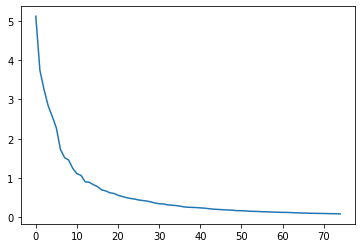

In [72]:
plt.plot(pca.explained_variance_[:75])

In [62]:
ind = np.random.choice(X_train.shape[0], 1000, replace=False)
X, y = X_train[ind], y_train[ind]
X_pca = pca.fit_transform(X)

cv = GridSearchCV(svm.SVC(), param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']},
                 refit=True, verbose=0)
cv.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print(cv.best_estimator_)
print(cv.best_score_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.924


In [64]:
ind = np.random.choice(X_train.shape[0], 1000, replace=False)
X, y = X_train[ind], y_train[ind]
X, y = X_train[ind], y_train[ind]
X_pca = pca.fit_transform(X)

cv = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors':[2,5,6,10,12,15]})
cv.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 5, 6, 10, 12, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)